# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# base url for openweathermap call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Create an empty list to hold weather data
cities_data = []

# Print to logger
print("Beginning Data Retrieval")
print ("-" * 15)

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in list
for index, city in enumerate(cities):
    
    # Group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the URL and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        cities_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Wind Speed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    except:
        print("City not found. Skipping ...")
        pass
    # Indicate that data loading is complete
        print("-----------------------")
        print("Data Retrieval Complete")
        print("-----------------------")

rd 39 of Set 5 | shibarghan
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 40 of Set 5 | west bay
Processing Record 41 of Set 5 | chokurdakh
Processing Record 42 of Set 5 | khasan
Processing Record 43 of Set 5 | tsaratanana
Processing Record 44 of Set 5 | saleaula
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 45 of Set 5 | port blair
Processing Record 46 of Set 5 | savelugu
Processing Record 47 of Set 5 | baie-comeau
Processing Record 48 of Set 5 | sur
Processing Record 49 of Set 5 | kamenskoye
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 0 of Set 6 | quelimane
Processing Record 1 of Set 6 | illoqqortoormiut
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 2 of Set 6 | ada
Processing Record 3 of Set 6 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert array of JSON into Pandas
cities_data_df = pd.DataFrame(cities_data)


# Extract relevant fields from the data frame
lats = cities_data_df["Lat"]
max_temps = cities_data_df["Max Temp"]
humidity = cities_data_df["Humidity"]
cloudiness = cities_data_df["Cloudiness"]
wind_speed = cities_data_df["Wind Speed"]

cities_data_df.to_csv(output_data_file, index_label="City_ID")

cities_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display the city Data Frame
cities_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kaeo,-35.10,173.78,54.55,82,89,3.56,NZ,1602824526
1,maningrida,-12.07,134.27,86.32,58,65,13.35,AU,1602824526
2,borogontsy,62.67,131.17,22.78,91,45,5.97,RU,1602824526
3,saint-philippe,-21.36,55.77,80.01,57,26,5.82,RE,1602824527
4,busselton,-33.65,115.33,70.00,33,38,4.97,AU,1602824527


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
cities_data_df[cities_data_df["Humidity"] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
#  Get the indices of cities that have humidity over 100%.
cities_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,20.100955,12.739288,62.139028,70.704861,51.951389,7.658316,1.602825e+09
std,32.964826,90.215235,18.791300,22.230485,38.151110,5.220271,6.461200e+01
min,-54.800000,-175.200000,3.740000,1.000000,0.000000,0.430000,1.602824e+09
25%,-5.972500,-67.520000,48.070000,59.000000,14.000000,3.360000,1.602825e+09
50%,23.770000,16.275000,64.615000,77.000000,54.000000,6.700000,1.602825e+09
75%,47.612500,86.700000,77.590000,87.000000,90.000000,10.427500,1.602825e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,29.080000,1.602825e+09


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# No cities with >100% humidity skipping

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

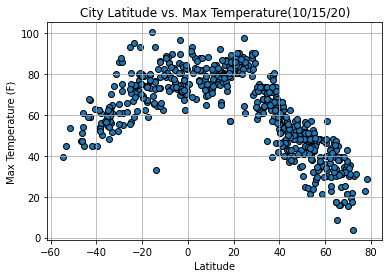

In [12]:
x = cities_data_df['Lat']
y_1 = cities_data_df['Max Temp']

plt.scatter(x, y_1, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Max Temperature(10/15/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#Save and Show Figure
plt.savefig("output_data\Latitude VS Temperature Plot.png")
#This plot is to demonstrate if the city latitude has a corelation to max temperatures.
#We can see that temperatures rise near 0 latitude - near the equator where temps are warmest.

## Latitude vs. Humidity Plot

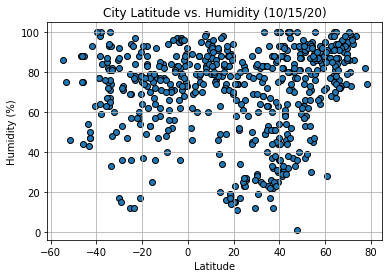

In [13]:
y_2 = cities_data_df['Humidity']

plt.scatter(x, y_2, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Humidity (10/15/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#Save and Show Figure
plt.savefig("output_data\Latitude vs Humidity Plot.png")


## Latitude vs. Cloudiness Plot

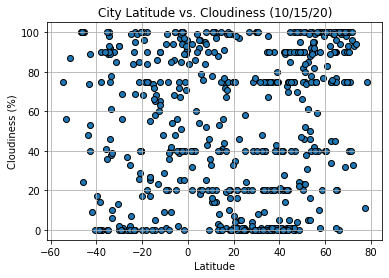

In [14]:
y_3 = cities_data_df['Cloudiness']

plt.scatter(x, y_3, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Cloudiness (10/15/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#Save and Show Figure
plt.savefig("output_data/Latitude vs Cloudiness Plot.png")

## Latitude vs. Wind Speed Plot

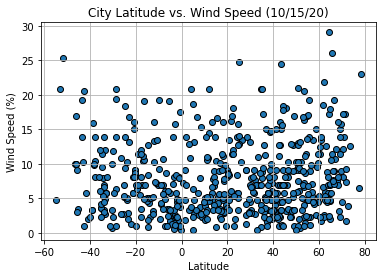

In [15]:
y_4 = cities_data_df['Wind Speed']

plt.scatter(x, y_4, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Wind Speed (10/15/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')

#Save and Show Figure
plt.savefig("output_data/Latitude vs Wind Speed Plot.png")

## Linear Regression

In [16]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-value is: {rvalue}")
    plt.show()

In [17]:
north = cities_data_df.loc[cities_data_df['Lat'] >= 0]
south = cities_data_df.loc[cities_data_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8826558097808035


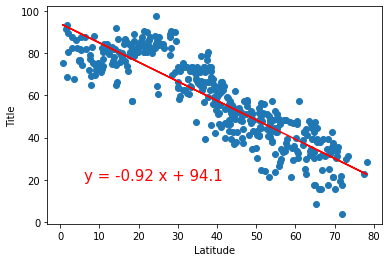

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = north ["Lat"]
y_values = north ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,20))

#Save and Show Figure
plt.savefig("output_data/NH Max Temp vs Lat Linear Reg.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6643968174943766


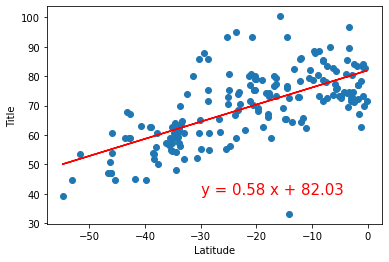

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = south ["Lat"]
y_values = south ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

#Save and Show Figure
plt.savefig("output_data/SH Max Temp vs Lat Linear Reg.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.21241683182483023


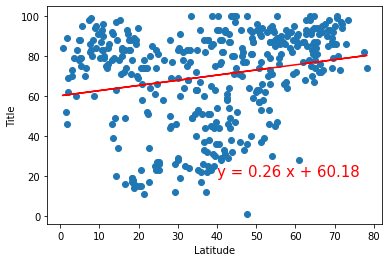

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = north ["Lat"]
y_values = north ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,20))

#Save and Show Figure
plt.savefig("output_data/NH Humidity vs Lat Linear Reg.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10734460747118038


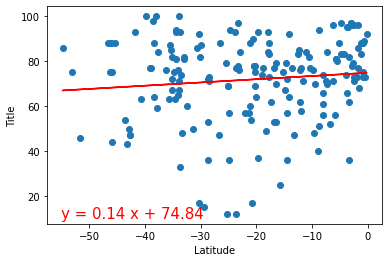

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = south ["Lat"]
y_values = south ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-55,10))

#Save and Show Figure
plt.savefig("output_data/SH Humidity vs Lat Linear Reg.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2968652792273482


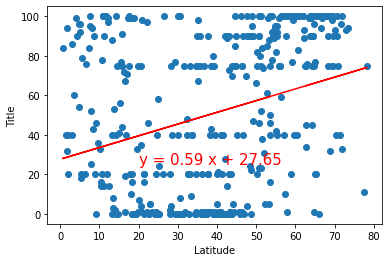

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = north ["Lat"]
y_values = north ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (20,25))

#Save and Show Figure
plt.savefig("output_data/NH Cloudiness vs Lat Linear Reg.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07069351746749632


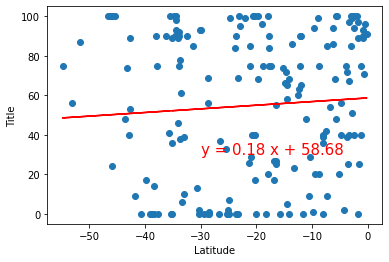

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = south ["Lat"]
y_values = south ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

#Save and Show Figure
plt.savefig("output_data/SH Cloudiness vs Lat Linear Reg.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.13033497061687999


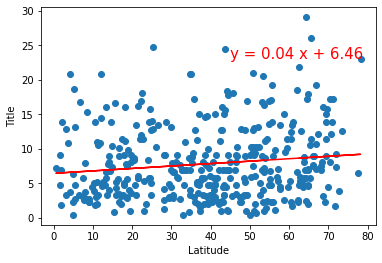

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = north ["Lat"]
y_values = north ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (45,23))

#Save and Show Figure
plt.savefig("output_data/NH Wind Speed vs Lat Linear Reg.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2596569955544942


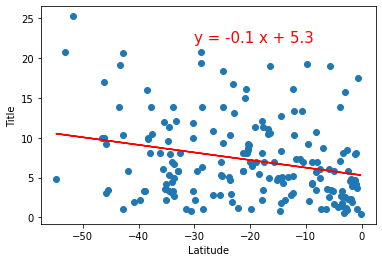

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = south ["Lat"]
y_values = south ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,22))

#Save and Show Figure
plt.savefig("output_data/SH Wind Speed vs Lat Linear Reg.png")